In [1]:
import pandas as pd
file_path ='./ref/부산광역시방범용CCTV 정보20230622.csv'
CCTV = pd.read_csv(file_path,encoding='EUC-KR')
CCTV

,CCTV 명칭,CCTV 좌표,CCTV 그룹
0,(10차)강서-10-232-1죽동동381가락송산마을(고1),"10.1.11.186:0:0:0:0:0:0,10.1.11.186:9400:",강서-10차
1,(10차)강서-10-232-2죽동동381가락송산마을(고2),"10.1.11.186:0:0:0:0:0:0,10.1.11.186:9400:",강서-10차
2,(10차)강서-10-233-1대저2동3147근린공원(고1),"10.1.11.186:0:0:0:0:0:0,10.1.11.186:9400:",강서-10차
3,(10차)강서-10-233-2대저2동3147근린공원(고2),"10.1.11.186:0:0:0:0:0:0,10.1.11.186:9400:",강서-10차
4,(10차)강서-10-235-2대저2동2041-40덕두시장,"10.1.11.186:0:0:0:0:0:0,10.1.11.186:9400:",강서-10차
...,...,...,...
6100,반여동_수협_맞은편,"10.1.12.28:0:0:0:0:0:0,10.1.12.28:9400:",해운대-폐공가
6101,양지빌라_뒤골목,"10.1.12.28:0:0:0:0:0:0,10.1.12.28:9400:",해운대-폐공가
6102,영진약국앞_사거리,"10.1.12.28:0:0:0:0:0:0,10.1.12.28:9400:",해운대-폐공가
6103,한신휴플러스_주변,"10.1.12.28:0:0:0:0:0:0,10.1.12.28:9400:",해운대-폐공가


In [2]:
cctv = CCTV.rename(columns={'CCTV 그룹':'local'})['local']
cctv.value_counts()

local
동래-15차     58
사하-15차     55
강서-9차      54
해운대-11차    53
기장-9차      48
           ..
남구-10차      5
중구-10차      5
북구-10차      4
기장-1차       2
중구-구방범      2
Name: count, Length: 256, dtype: int64

In [3]:
# 각 값에서 "-"를 기준으로 분할하고, 첫 번째 부분만 남김
# ex) 사하-15차에서 -를 기준으로 분리하고 [0]번 인덱스인 사하만 반환
cctv = cctv.apply(lambda x: x.split('-')[0])
cctv = cctv.value_counts()
# reset_index()를 사용하면 Series → DataFrame 형태로 변환됩니다.
# 원래는 value_counts() 결과가 Series(1차원) 이지만, 이를 DataFrame(2차원)으로 변경하는 과정입니다.
cctv = cctv.reset_index()

In [4]:
cctv.sample(3)

,local,count
5,북구,403
2,해운대,418
7,영도,381


In [5]:
!pip install openpyxl

In [6]:
import pandas as pd
import warnings
warnings.simplefilter('ignore', UserWarning)
file_path2 = './ref/연령별인구현황월간202306.xlsx'
ori = pd.read_excel(file_path2,sheet_name='연령별인구현황',skiprows=3)
ori.head()

,행정기관코드,행정기관,총 인구수,연령구간인구수,0~9세,10~19세,20~29세,30~39세,40~49세,50~59세,...,10~19세.2,20~29세.2,30~39세.2,40~49세.2,50~59세.2,60~69세.2,70~79세.2,80~89세.2,90~99세.2,100세 이상.2
0,2600000000,부산광역시,"3,306,993","3,306,993","200,627","264,771","386,558","393,792","489,807","539,964",...,"128,872","187,837","191,071","242,526","276,337","296,378","172,706","87,000","13,119",384
1,2611000000,부산광역시 중구,"39,311","39,311",931,"1,773","5,638","4,310","4,582","6,423",...,914,"2,964","2,037","2,096","3,078","4,109","2,877","1,532",251,15
2,2614000000,부산광역시 서구,"104,449","104,449","5,060","7,063","12,272","10,400","13,778","16,812",...,"3,447","6,366","5,059","6,730","8,260","10,223","7,044","3,969",632,12
3,2617000000,부산광역시 동구,"86,809","86,809","3,903","4,636","9,480","10,598","11,324","13,941",...,"2,254","4,847","4,991","5,212","6,703","8,376","6,120","3,566",494,10
4,2620000000,부산광역시 영도구,"107,006","107,006","4,364","6,815","10,089","9,716","13,733","17,687",...,"3,324","4,551","4,448","6,540","8,538","11,533","8,255","4,438",601,17


In [7]:
data1 = ori.copy()

In [8]:
data1 = ori[['행정기관','총 인구수']]
data1.columns = ['local','population']
# 0 부산광역시	3,306,993 총 계를 없애버림
data1 = data1.loc[1:] 
data1['local'] = data1['local'].apply(lambda x: x.replace('부산광역시 ',''))
# data.replace('부산광역시 ','')
data1 = data1.reset_index(drop=True) #reset_index(drop=True)를 사용하면 기존 인덱스를 제거하고 새롭게 0부터 부여합니다.
data1

,local,population
0,중구,"39,311"
1,서구,"104,449"
2,동구,"86,809"
3,영도구,"107,006"
4,부산진구,"357,475"
5,동래구,"272,590"
6,남구,"255,786"
7,북구,"276,684"
8,해운대구,"383,355"
9,사하구,"300,922"


In [9]:
data1['local'] = data1['local'].apply(lambda x: x.replace('구','').replace('군','').replace('부산진','진구').strip() if len(x.strip()) > 2 else x.strip())
data1

,local,population
0,중구,"39,311"
1,서구,"104,449"
2,동구,"86,809"
3,영도,"107,006"
4,진구,"357,475"
5,동래,"272,590"
6,남구,"255,786"
7,북구,"276,684"
8,해운대,"383,355"
9,사하,"300,922"


In [10]:
# cctv와 data 두 개의 데이터프레임을 'local' 컬럼을 기준으로 병합(merge)합니다.
# 즉, CCTV 개수 데이터와 인구 데이터를 지역별(local)로 결합하는 과정입니다.
total = pd.merge(cctv, data1, on='local')
total['population']=total['population'].str.replace(',','').astype(int)
total = total.sort_values(by='population',ascending=False)
# 'local' 컬럼을 인덱스로 설정 (행 이름으로 변경)
# 즉, 지역명을 고유한 행 인덱스로 변경
total = total.set_index('local') # 중요함.
total

,count,population
local,,
해운대,418,383355
진구,395,357475
사하,431,300922
북구,403,276684
동래,404,272590
남구,351,255786
금정,403,218711
사상,422,203029
연제,377,202919


Text(0.3, 0.3, '한글')

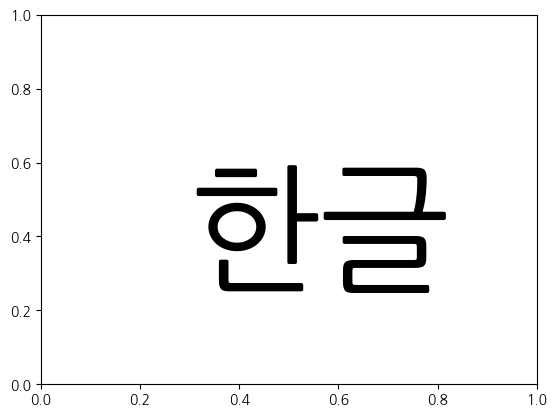

In [11]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.font_manager as fm

plt.rc('font',family="NanumGothic")
plt.text(0.3,0.3,'한글',size=100)


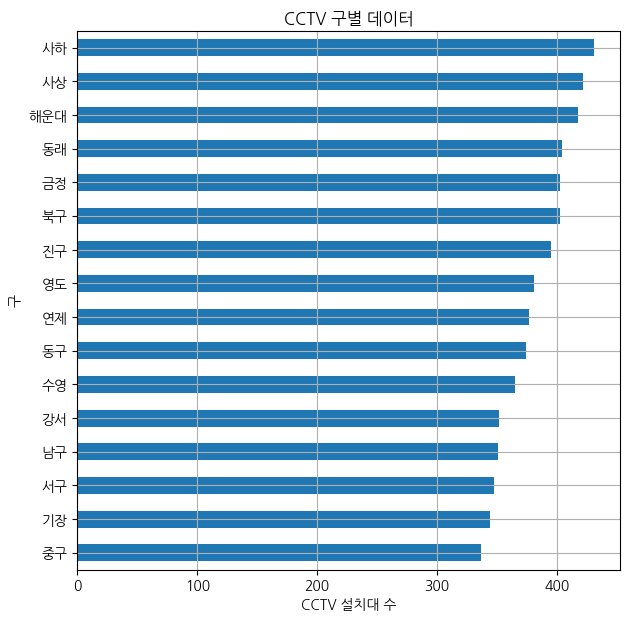

In [12]:
total['count'].sort_values().plot(kind='barh',grid=True,figsize=(7,7), ylabel='구')

# ylabel은 plot() 내부에서 지원되기 때문에 한 줄로 설정 가능
# 하지만 xlabel은 지원되지 않아서 plt.xlabel()로 따로 설정해야 함
# 일관성을 위해 plt.ylabel()을 쓰는 것도 좋은 방법

plt.title('CCTV 구별 데이터')
plt.xlabel('CCTV 설치대 수')
plt.show()

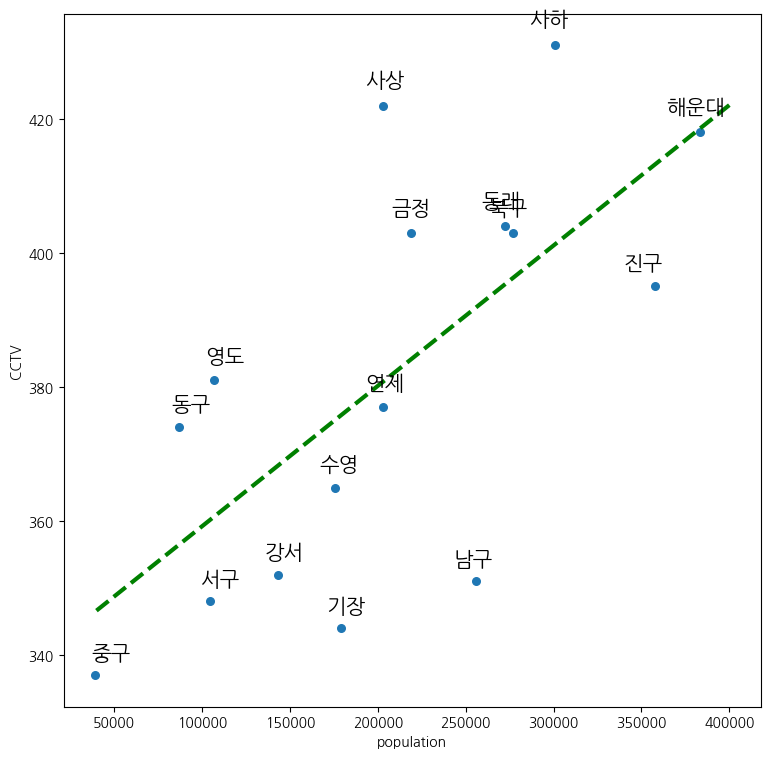

In [13]:
import numpy as np

# 선을 점 사이에 가깝게 붙이려고 쓰는 구문
# np.polyfit(x, y, 1) 함수는 주어진 데이터(x, y)에 대해 1차원 다항식을 피팅하는 함수입니다. 여기서 1은 1차 함수(즉, 선형 회귀)를 의미합니다.
# total['population']은 x 값 (인구수), total['count']은 y 값 (CCTV 수)입니다.
fp1 = np.polyfit(total['population'],total['count'],1)
f1 = np.poly1d(fp1)
fx = np.linspace(40000,400000,10)
plt.figure(figsize=(9,9))
plt.plot(fx,f1(fx), ls='dashed', lw=3, color='g')

plt.scatter(total['population'],total['count'], s=30)
plt.xlabel('population')
plt.ylabel('CCTV')
plt.plot()
# 점마다 각 구의 이름(라벨)을 부여
for i in range(len(total['population'])):
    plt.text(total['population'].iloc[i]*0.95,total['count'].iloc[i]*1.007,total.index[i], fontsize=15)

plt.show()


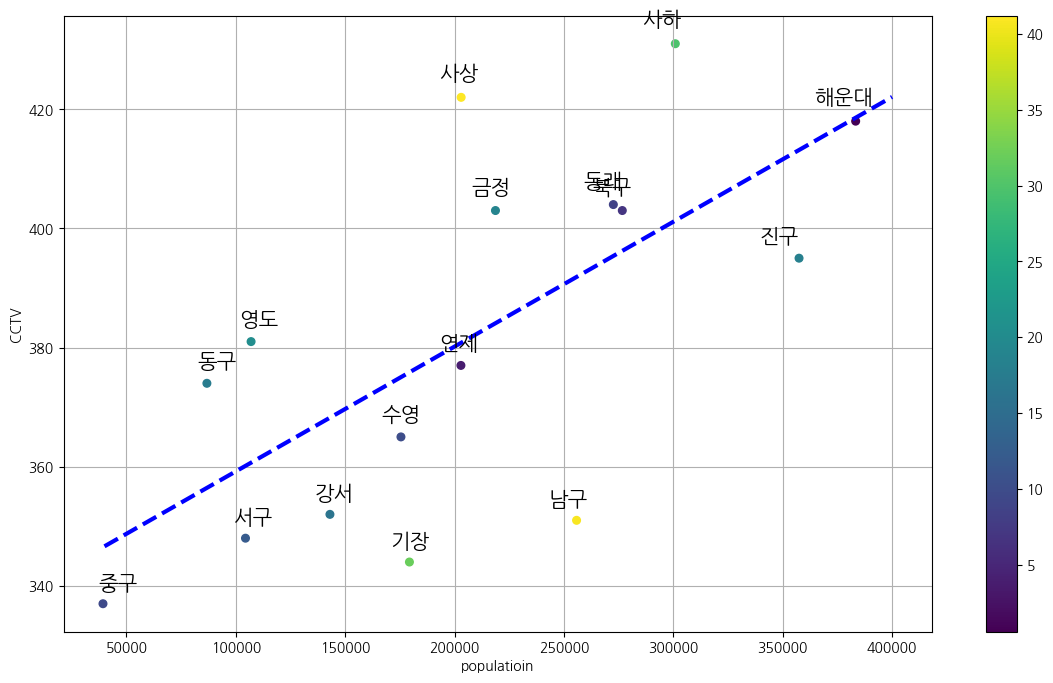

In [14]:
import numpy as np
fp1 = np.polyfit(total['population'],total['count'], 1)
f1 = np.poly1d(fp1)
fx = np.linspace(40000,400000,10)
plt.figure(figsize=(14,8))
plt.plot(fx,f1(fx), ls='dashed', lw=3, color='b')

# 오차
total['err'] = np.abs(total['count'] - f1(total['population']))

plt.scatter(total['population'], total['count'], s= 30, c = total['err'])
plt.xlabel('populatioin')
plt.ylabel('CCTV')
plt.plot()

# 점마다 각 동의 이름을 부여
for i in range(len(total['population'])):
    plt.text(total['population'].iloc[i]*0.95, total['count'].iloc[i]*1.007, total.index[i], fontsize=15)
plt.grid()
plt.colorbar()
plt.show()

In [15]:
# https://kosis.kr/statHtml/statHtml.do?sso=ok&returnurl=https%3A%2F%2Fkosis.kr%3A443%2FstatHtml%2FstatHtml.do%3Fconn_path%3DMT_ZTITLE%26list_id%3D135_001_002_001%26obj_var_id%3D%26seqNo%3D%26tblId%3DTX_13501_A048%26vw_cd%3DMT_ZTITLE%26itm_id%3D%26language%3Dkor%26lang_mode%3Dko%26orgId%3D135%26

In [16]:
import pandas as pd
file_path3 ='./ref/부산범죄발생지2023.csv'
crime = pd.read_csv(file_path3,encoding='EUC-KR')
crime

,시점,발생지별(1),발생지별(2),범죄발생 총건수(A) (건),인구(B) (명),A/B×100000 (%),형법범 (건),특별법범 (건)
0,2023,부산,소계,120060,3293362,3645.5,79058,41002
1,2023,부산,중구,3821,38619,9894.1,2713,1108
2,2023,부산,서구,3688,104089,3543.1,2613,1075
3,2023,부산,동구,4895,87792,5575.7,3031,1864
4,2023,부산,영도,3413,106548,3203.3,2235,1178
5,2023,부산,부산진,17168,359508,4775.4,12248,4920
6,2023,부산,동래,7388,270815,2728.1,5331,2057
7,2023,부산,남구,8951,254185,3521.5,5405,3546
8,2023,부산,북구,6210,273596,2269.8,4431,1779
9,2023,부산,해운대,12133,380448,3189.1,8071,4062


In [17]:
data2 = crime.rename(columns={'발생지별(2)':'location','범죄발생 총건수(A) (건)':'case', '인구(B) (명)':'people'})
data2

,시점,발생지별(1),location,case,people,A/B×100000 (%),형법범 (건),특별법범 (건)
0,2023,부산,소계,120060,3293362,3645.5,79058,41002
1,2023,부산,중구,3821,38619,9894.1,2713,1108
2,2023,부산,서구,3688,104089,3543.1,2613,1075
3,2023,부산,동구,4895,87792,5575.7,3031,1864
4,2023,부산,영도,3413,106548,3203.3,2235,1178
5,2023,부산,부산진,17168,359508,4775.4,12248,4920
6,2023,부산,동래,7388,270815,2728.1,5331,2057
7,2023,부산,남구,8951,254185,3521.5,5405,3546
8,2023,부산,북구,6210,273596,2269.8,4431,1779
9,2023,부산,해운대,12133,380448,3189.1,8071,4062


In [18]:
data2 = data2.iloc[:,2:4]
data2

,location,case
0,소계,120060
1,중구,3821
2,서구,3688
3,동구,4895
4,영도,3413
5,부산진,17168
6,동래,7388
7,남구,8951
8,북구,6210
9,해운대,12133


In [19]:
data2 = data2.set_index('location')
data2

,case
location,
소계,120060
중구,3821
서구,3688
동구,4895
영도,3413
부산진,17168
동래,7388
남구,8951
북구,6210


In [20]:
data2 = data2.loc['중구':]
data2

,case
location,
중구,3821
서구,3688
동구,4895
영도,3413
부산진,17168
동래,7388
남구,8951
북구,6210
해운대,12133


In [21]:
data2 = data2.sort_values(by='case', ascending=False)
data2

,case
location,
부산진,17168
사하,12180
해운대,12133
남구,8951
연제,8019
사상,7630
동래,7388
금정,7242
북구,6210


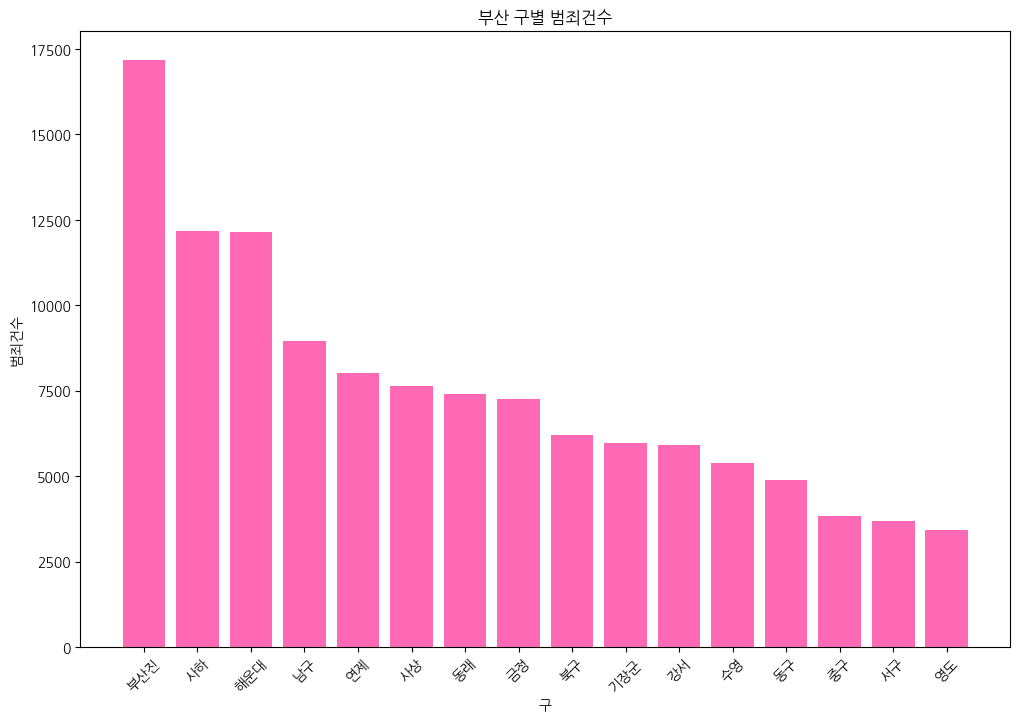

In [22]:
plt.figure(figsize=(12, 8))
plt.bar(data2.index, data2['case'], color='hotpink')
plt.xlabel('구')
plt.ylabel('범죄건수')
plt.title('부산 구별 범죄건수')
plt.xticks(rotation=45)
plt.show()

In [23]:
data3 = crime.copy()

In [24]:
data3 = crime.rename(columns={'발생지별(2)':'location','인구(B) (명)':'people'})
data3

,시점,발생지별(1),location,범죄발생 총건수(A) (건),people,A/B×100000 (%),형법범 (건),특별법범 (건)
0,2023,부산,소계,120060,3293362,3645.5,79058,41002
1,2023,부산,중구,3821,38619,9894.1,2713,1108
2,2023,부산,서구,3688,104089,3543.1,2613,1075
3,2023,부산,동구,4895,87792,5575.7,3031,1864
4,2023,부산,영도,3413,106548,3203.3,2235,1178
5,2023,부산,부산진,17168,359508,4775.4,12248,4920
6,2023,부산,동래,7388,270815,2728.1,5331,2057
7,2023,부산,남구,8951,254185,3521.5,5405,3546
8,2023,부산,북구,6210,273596,2269.8,4431,1779
9,2023,부산,해운대,12133,380448,3189.1,8071,4062


In [25]:
data3 = data3.iloc[:,2:5:2]
data3

,location,people
0,소계,3293362
1,중구,38619
2,서구,104089
3,동구,87792
4,영도,106548
5,부산진,359508
6,동래,270815
7,남구,254185
8,북구,273596
9,해운대,380448


In [26]:
data3 = data3.set_index('location')
data3

,people
location,
소계,3293362
중구,38619
서구,104089
동구,87792
영도,106548
부산진,359508
동래,270815
남구,254185
북구,273596


In [27]:
data3 = data3.loc['중구':]
data3

,people
location,
중구,38619
서구,104089
동구,87792
영도,106548
부산진,359508
동래,270815
남구,254185
북구,273596
해운대,380448


In [28]:
data3 = data3.sort_values(by='people', ascending=False)
data3

,people
location,
해운대,380448
부산진,359508
사하,297831
북구,273596
동래,270815
남구,254185
금정,215590
연제,205766
사상,202932


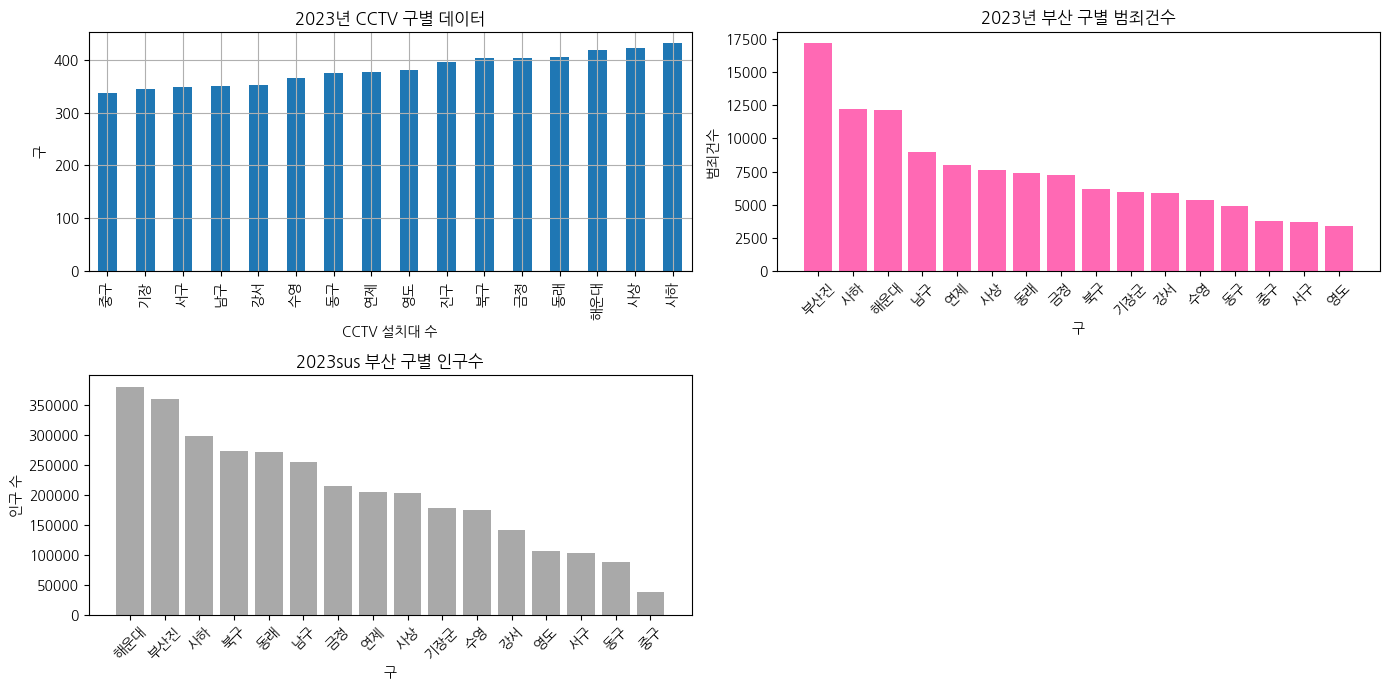

In [36]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(14, 7))  # 1행 2열 서브플롯 생성

# 첫 번째 그래프 (왼쪽)
total['count'].sort_values().plot(kind='bar', grid=True, ax=axes[0,0])
axes[0,0].set_title('2023년 CCTV 구별 데이터')
axes[0,0].set_xlabel('CCTV 설치대 수')
axes[0,0].set_ylabel('구')

# 두 번째 그래프 (오른쪽)
# sorted_data2 = data2.sort_index()  # 인덱스를 기준으로 정렬
# sorted_data2['case'].plot(kind='bar', grid=True, ax=axes[1])
# data2.index.sort_values().plot(kind='bar', grid=True, ax=axes[1])
axes[0,1].bar(data2.index, data2['case'], color='hotpink')
axes[0,1].set_title('2023년 부산 구별 범죄건수')
axes[0,1].set_xlabel('구')
axes[0,1].set_ylabel('범죄건수')
axes[0,1].set_xticklabels(data2.index, rotation=45)

axes[1,0].bar(data3.index, data3['people'], color='darkgray')
axes[1,0].set_title('2023sus 부산 구별 인구수')
axes[1,0].set_xlabel('구')
axes[1,0].set_ylabel('인구 수')
axes[1,0].set_xticklabels(data3.index, rotation=45)

# 🔹 빈 그래프 제거 (2행 2열이므로 오른쪽 아래 공간을 제거)
fig.delaxes(axes[1, 1])

plt.tight_layout()  # 레이아웃 자동 조정
plt.show()


<부산시 구별 CCTV, 범죄건수, 인구수 분석 보고서>
1. 개요
본 데이터는 부산시 각 구별 CCTV 설치 현황, 범죄 발생 건수, 그리고 인구수를 비교 분석하여 상호 연관성을 파악하고, 도시 안전 및 정책 수립에 참고할 수 있도록 작성되었습니다.

2. 데이터 개요
분석 대상은 부산시 16개 구의 CCTV 설치 대수, 범죄 발생 건수, 인구수 데이터입니다.
각 데이터의 특징은 다음과 같습니다.

CCTV 설치 대수: 구별 공공 CCTV의 설치 현황
범죄 발생 건수: 구별 범죄 발생 횟수
인구수: 구별 총 인구수

3. 데이터 분석<br>
🔹 (1) CCTV 설치 대수 분석<br>
CCTV 설치 대수는 구별 큰 차이가 없으며 비교적 균일한 분포를 보이고 있습니다.
CCTV 개수만으로는 특정 구의 안전도를 직접적으로 판단하기 어려우며, 범죄 발생률과의 비교 분석이 필요합니다.<br>
🔹 (2) 범죄 발생 건수 분석<br>
부산진구(17,168건), 사하구(12,180건), 해운대구(12,133건)**에서 범죄 발생 건수가 가장 많았습니다.
반면, 영도구(3,413건), 서구(3,688건), 중구(3,821건)는 범죄 건수가 상대적으로 적었습니다.
범죄 건수가 높은 지역은 유동 인구가 많거나 상업지구가 발달한 지역일 가능성이 큽니다.<br>
🔹 (3) 인구수 분석<br>
해운대구(380,448명), 부산진구(359,508명), 사하구(297,831명)가 가장 많은 인구를 보였습니다.
반면, 중구(38,619명), 동구(87,792명), 서구(104,089명)는 인구 수가 적었습니다.
인구수가 많은 지역이 범죄 발생 건수도 높은 경향을 보이지만, CCTV 설치 대수와의 직접적인 상관관계는 추가 분석이 필요합니다.

5. 결론 및 시사점
- 범죄 발생 건수는 인구수가 많은 지역과 높은 상관관계를 보인다.
인구 밀집 지역일수록 범죄 발생 빈도가 증가하는 경향이 있음.
다만, CCTV 개수와 범죄율 간의 직접적인 관계 분석이 추가적으로 필요함.

- CCTV 설치 대수를 범죄율과 연계하여 조정할 필요가 있다.
CCTV 설치가 많은 곳과 범죄율이 높은 지역을 비교하여, CCTV 추가 설치 및 효율적 운영 방안 고려
예를 들어, 부산진구, 사하구, 해운대구와 같은 범죄 다발 지역에 보다 밀집된 CCTV 배치 필요

- 추가 분석 가능성
CCTV가 실제 범죄 예방에 미치는 영향을 분석하기 위해 CCTV 밀집 지역과 범죄율 변화 추적
야간 범죄율, 유동 인구 데이터와의 비교 분석을 통해 보다 정밀한 연구 수행 가능









